In [7]:
# Memanggil pustaka yang digunakan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
dataLabel = pd.read_csv("C:/Users/USER/Documents/0. TUGAS AKHIR/Data Skripsi TEP/Data Baru/Data Latih Berlabel 150.csv")
dataLabel.drop("Unnamed: 0", axis=1, inplace=True)
dataUnlabel = pd.read_csv("C:/Users/USER/Documents/0. TUGAS AKHIR/Data Skripsi TEP/Data Baru/Data Latih Tidak Berlabel 150.csv")
dataUnlabel.drop("Unnamed: 0", axis=1, inplace=True)
dataUji = pd.read_csv("C:/Users/USER/Documents/0. TUGAS AKHIR/Data Skripsi TEP/Data Baru/Data Uji 150.csv")
dataUji.drop("Unnamed: 0", axis=1, inplace=True)
dataVal = pd.read_csv("C:/Users/USER/Documents/0. TUGAS AKHIR/Data Skripsi TEP/Data Baru/Data Validasi 150.csv")
dataVal.drop("Unnamed: 0", axis=1, inplace=True)
print(dataLabel.shape, dataUnlabel.shape, dataUji.shape, dataVal.shape)

(1690, 7) (2535, 7) (528, 7) (529, 7)


In [3]:
dataLabel

,0_Median absolute diff,0_Median absolute deviation,0_Min,0_Max,0_ECDF Percentile_0,0_Peak to peak distance,Label
0,0.523043,0.523043,-1.575049,1.563212,-0.528962,3.138260,2
1,0.085755,0.574556,-1.065287,1.490200,-0.567911,2.555487,3
2,0.102759,0.188392,-0.652062,0.786571,-0.249587,1.438632,2
3,0.523997,0.523997,-1.049635,1.570349,-0.525638,2.619985,3
4,0.077070,0.792104,-1.337125,1.437381,-0.840454,2.774505,2
...,...,...,...,...,...,...,...
1685,0.078159,0.082502,-1.068892,-0.521776,-0.921257,0.547116,1
1686,0.523043,0.523043,-1.575049,1.040168,-1.052005,2.615217,2
1687,0.092585,0.277755,-0.154949,1.131983,0.132065,1.286931,0
1688,0.085755,0.248688,-0.550760,0.847040,-0.199166,1.397800,3


In [4]:
lis = ["0_Median absolute diff", "0_Median absolute deviation", "0_Min", "0_Max"]
X_label = dataLabel[lis]
Y_label = dataLabel["Label"]
X_Unlabel = dataUnlabel[lis]
Y_Unlabel = dataUnlabel["Label"]
X_uji = dataUji[lis]
Y_uji = dataUji["Label"]
X_val = dataVal[lis]
Y_val = dataVal["Label"]

In [5]:
Y_val

0      3
1      1
2      2
3      2
4      2
      ..
524    2
525    2
526    1
527    0
528    2
Name: Label, Length: 529, dtype: int64

In [8]:
label_scaler150 = MinMaxScaler().fit(X_label.values)

In [9]:
joblib.dump(label_scaler150, "label_scaler_model1")

['label_scaler_model1']

In [10]:
scale_label = label_scaler150.transform(X_label.values)
scale_Unlabel = label_scaler150.transform(X_Unlabel.values)
scale_uji = label_scaler150.transform(X_uji.values)
scale_Val = label_scaler150.transform(X_val.values)

In [11]:
Xlabel = scale_label
XUnlabel = scale_Unlabel
Xuji = scale_uji
Xval = scale_Val

In [12]:
X_label = dataLabel.iloc[:,:4].values
y_label = dataLabel.iloc[:,-1].values
X_Unlabel = StandardScaler().fit(dataUnlabel.iloc[:,:4].values)
y_Unlabel = dataUnlabel.iloc[:,-1].values
X_test = StandardScaler().fit(dataUji.iloc[:,:4].values)
y_test = dataUji.iloc[:,-1].values
X_val = StandardScaler().fit(dataVal.iloc[:,:4].values)
y_val = dataVal.iloc[:,-1].values

              precision    recall  f1-score   support

           0       0.87      0.90      0.88       124
           1       0.69      0.81      0.75       125
           2       0.68      0.71      0.70       138
           3       0.79      0.62      0.70       142

    accuracy                           0.75       529
   macro avg       0.76      0.76      0.75       529
weighted avg       0.76      0.75      0.75       529



C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[111   8   3   2]
 [  7 101  12   5]
 [  6  18  98  16]
 [  4  19  31  88]]


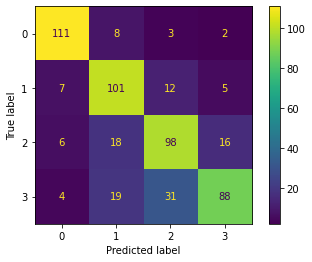

In [13]:
knn1 = KNeighborsClassifier(n_neighbors=5, p=1).fit(Xlabel, Y_label)
y_pred1 = knn1.predict(Xval)

cr = classification_report(Y_val,  y_pred1)
print(cr)
plot_confusion_matrix(knn1, Xval, Y_val)
print(confusion_matrix(Y_val, y_pred1))

In [14]:
y_pred1 = knn1.predict(XUnlabel)
y_prob  = knn1.predict_proba(XUnlabel)
df = pd.DataFrame(y_prob, columns = ["C1Prob", "C2Prob", "C3Prob", "C4Prob"])
df["LabelSemu"] = y_pred1
df["aktual"] = Y_Unlabel
df["Max"] = df[["C1Prob", "C2Prob", "C3Prob", "C4Prob"]].max(axis=1)
nc = np.arange(0.4, 1, 0.06)
acc = np.empty(10)
f1skor = np.empty(10) 
i = 0
for k in np.nditer(nc):
    conf_ind = df["Max"]>k
    X_train1 = np.append(Xlabel, XUnlabel[conf_ind, :], axis=0)
    y_train1 = np.append(Y_label, df.loc[conf_ind, ["LabelSemu"]])
    clf = KNeighborsClassifier(n_neighbors=5, p=1).fit(X_train1, y_train1)
    y_pred3 =  clf.predict(Xval)
    acc[i] = clf.score(Xval, Y_val)*100
    i = i + 1

In [15]:
acc

array([74.85822306, 74.85822306, 74.85822306, 74.85822306, 75.80340265,
       75.80340265, 75.80340265, 75.61436673, 75.61436673, 75.61436673])

In [16]:
joblib.dump(clf, "deteksi_model")

['deteksi_model']